# Best-Practices Handbook - Skewness

**Requirements**
1. Definition: Technical definition using formulas or equations ( Copy paste from
external sources with or without acknowledging the source is not ok. The
language should be your own. Turnitin will detect blocks of copy-pasted text)
2. Description: Written explanation (1–2 sentences)
3. Demonstration: Numerical example using either real-world data or simulated
data. Real-world data is likely more interesting, but simulated data allows us to
concentrate on the issues in isolation and thus create clear examples of what
happens.
3. Diagram: Visual example using the real-world data or simulated data that were
utilized in the Demonstration.
4. Diagnosis: Describe how to recognize or test that the problem exists
5. Damage: Clear statement of the damaged caused by the problem
6. Directions: Suggested models or methodologies that can address the particular
issue(s) you considered.

### Description

Skewness is a measure that describes the shape of a (probability) distribution. Specifically, it's a measure of assymetry of the data points that form the distribution. Assymetric distributions can be left-skewed negative) or right-skewed (positive). A symmetric distribution has a skew of zero and is a normal distribution. 

A left-skewed distribution is characterised by a longer or fatter tail on the left side of the distribution, while a right-skewed distribution shows a longer of fatter tail on the right side of the distribution (Chen, 2024). 

Other than the visual inspection of the distribution or data histogram, one can also determine skewness by studying the mean and median of a distribution. When data has a right-skew (positive), the mean value is larger than the median value. The opposite is true for a left-skewed distribution where the mean value is smaller than the median value (Chen, 2021).

### Definition

There are two main methods for measuring skewness. Pearson's first skewness coeffcient measures the mode skewness, Pearson's second skewness coefficient measures the median skewness (Taylor, as of 2024). Which skewness we want to use depends on the data sample. If the data has a strong (as in clearly defined) mode, Pearson's first coefficient is preferred, but if the data has a weak or multiple modes, Pearson's second coefficient might be a better measure (Chen, 2024).

The formulas for both are below:
$$
\text{Pearson's first coefficient of skewness} = \frac{3*(\text{Mean} - \text{Median})}{\text{Standard Deviation}}
$$

$$
\text{Pearson's second coefficient of skewness} = \frac{(\text{Mean} - \text{Mode})}{\text{Standard Deviation}}
$$

...

### Demonstration, Diagram & Diagnosis

In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

In [2]:
bned = yf.download('BNED', start="2020-01-01")
bned.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,4.32,4.35,4.03,4.05,4.05,240700
2020-01-03,4.06,4.10,3.82,3.89,3.89,425700
2020-01-06,3.90,4.51,3.87,4.35,4.35,499900
2020-01-07,4.32,4.32,4.09,4.12,4.12,279800
2020-01-08,3.98,4.16,3.89,3.90,3.90,387700


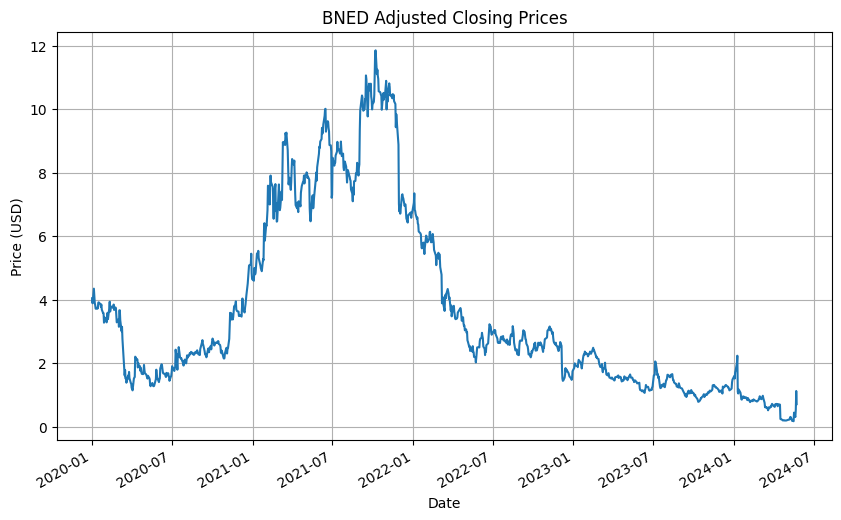

In [3]:
plt.figure(figsize=(10, 6))
bned['Adj Close'].plot()
plt.title('BNED Adjusted Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()

In [4]:
bned['Daily Return'] = bned['Adj Close'].pct_change()
bned.head()

,Open,High,Low,Close,Adj Close,Volume,Daily Return
Date,,,,,,,
2020-01-02,4.32,4.35,4.03,4.05,4.05,240700,NaN
2020-01-03,4.06,4.10,3.82,3.89,3.89,425700,-0.039506
2020-01-06,3.90,4.51,3.87,4.35,4.35,499900,0.118252
2020-01-07,4.32,4.32,4.09,4.12,4.12,279800,-0.052874
2020-01-08,3.98,4.16,3.89,3.90,3.90,387700,-0.053398


Text(0, 0.5, 'Frequency')

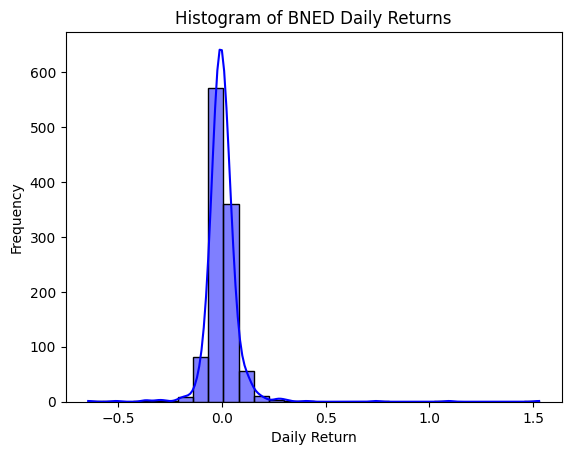

In [5]:
sns.histplot(bned['Daily Return'].dropna(), bins=30, kde=True, color='blue')
plt.title('Histogram of BNED Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')

We see that there is more data concentrated on the left side of the distribution while the right-side tail is longer, indicating a right-skewed distribution.

(-0.04, 0.04)

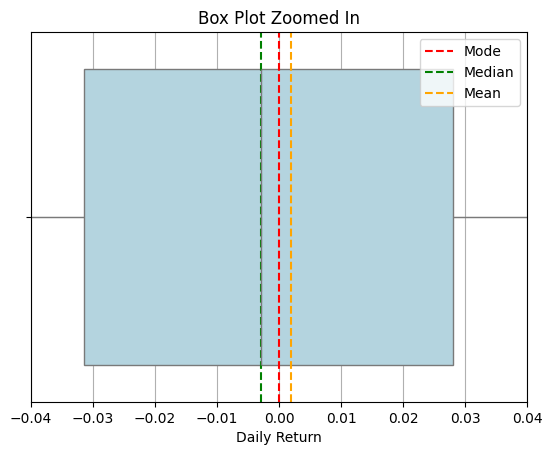

In [6]:
# Lets zoom in closer to where the returns are concentrated to get a better look at mean, median and mode

sns.boxplot(x=bned['Daily Return'], color='lightblue')

mode_val = bned['Daily Return'].mode().values[0]
median_val = bned['Daily Return'].median()
mean_val = bned['Daily Return'].mean()

plt.axvline(x=mode_val, color='red', linestyle='--', label='Mode')
plt.axvline(x=median_val, color='green', linestyle='--', label='Median')
plt.axvline(x=mean_val, color='orange', linestyle='--', label='Mean')

plt.title('Box Plot Zoomed In')
plt.xlabel('Daily Return')
plt.legend()
plt.grid(True)
plt.xlim(left=-0.04, right=0.04)

We see that the mean is larger than the median, further indicating that we are looking at a right-skewed distribution.

In [7]:
skewness = skew(bned['Daily Return'].dropna())
print("Skewness of Daily Returns:", round(skewness, 4))

Skewness of Daily Returns: 6.1038


Lastly, running the skew calculation confirms that the stock price movements of BNED are positive and therefore right-skewed.

### Damage

### Directions

### References
1. Chen, James. "Right Skewed vs. Left Skewed Distribution.", 6 Mar. 2024, www.investopedia.com/terms/s/skewness.asp#:~:text=Skewness%20is%20the%20degree%20of,or%20negative%20and%20left%2Dskewed.
2. Taylor, Sebastian. "Skewness - A measure of the deviation of a random variable's given distribution from the normal distribution.", corporatefinanceinstitute.com/resources/data-science/skewness/.